<div class="usecase-title">{Influence of Employment on Price of Houses}</div>

<div class="usecase-authors"><b>Authored by: </b> {Daljeet Kaur}</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

# **<div class="usecase-section-header">Scenario</div>**

{In the bustling city of Melbourne, urban planners and policymakers are eager to gain insights into the intricate relationship between employment trends and the housing market. Leveraging the City of Melbourne's Census of Land Use and Employment (CLUE) dataset, they embark on a mission to explore this dynamic. Specifically, they focus on the "Jobs per ANZSIC for blocks" dataset, which offers detailed employment data across various industries and geographical areas, to uncover correlations with housing prices in different neighborhoods.

As I analyze the data, patterns start to emerge, revealing that certain industries, such as technology and finance, have a significant influence on local housing prices, driving up demand and property values. Conversely, fluctuations in employment within other industries may have a lesser impact or even show a negative correlation with housing prices.

These insights provide urban planners with a deeper understanding of the factors influencing Melbourne's housing market. Armed with data-driven evidence, I can help refine urban development strategies to foster economic growth, maintain housing affordability, and create vibrant, sustainable communities for Melbourne's residents.}

# <div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {You plan to learn how to merge and clean datasets from various sources, ensuring data consistency for accurate analysis. Through Exploratory Data Analysis, You will understand the data's structure, identify patterns, and uncover relationships between variables.

You aim to gain experience in assessing the correlation between employment trends across different industries and house prices in various areas, using statistical techniques. This use case will allow you to apply statistical methods such as hypothesis testing and regression analysis to draw meaningful conclusions.

Additionally, You plan to upskill by exploring machine learning algorithms to predict house prices based on employment data and other factors, deepening my understanding of predictive modeling techniques.

By analyzing the impact of employment on housing prices, You will gain insights into urban planning considerations and the economic dynamics of Melbourne's neighborhoods.}

# **<div class="usecase-section-header">{INTRODUCTION}</div>**

{In this project, I will analyze the relationship between employment trends and housing prices within the City of Melbourne. By examining datasets provided by the city, my goal is to understand how fluctuations in employment across different industries impact the housing market. This analysis is crucial for urban planning and economic development within Melbourne. The datasets include information on employment levels categorized by industry (ANZSIC codes) and housing prices by small area.

Employment patterns significantly influence housing demand and property prices. Changes in employment levels within specific industries can lead to shifts in population demographics, housing preferences, and overall market dynamics. Understanding these correlations is vital for urban planners and stakeholders to make informed decisions about housing affordability, workforce development, and infrastructure planning.

Through this project, I aim to uncover insights into the relationship between employment and housing markets. By leveraging data science techniques, statistical analysis, and machine learning algorithms, I hope to identify patterns, trends, and correlations that can guide strategic decision-making. Ultimately, my goal is to contribute to the creation of smarter cities, gain deeper insights into urban dynamics, identify areas for improvement, and develop innovative solutions to foster inclusive and resilient communities.}



# Dataset List
Jobs per ANZSIC for blocks

House Prices by Small Area - Sale Year

# **Contents**

Import important Libraries

Connect, Test and Analysis of Datasets

In [3]:
# Standard
import os
import json
import io
# Data import
import requests

# Data manipulation
import pandas as pd
import seaborn as sns
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVR
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [4]:
def download_and_load_csv(url):
    response = requests.get(url)
    csv_string = response.content.decode('utf-8')
    df = pd.read_csv(io.StringIO(csv_string))
    return df

# API Link
download_link_1 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/employment-by-block-by-anzsic/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'

# Use functions to download and load data
df = download_and_load_csv(download_link_1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12394 entries, 0 to 12393
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Census year                                      12394 non-null  int64  
 1   Block ID                                         12394 non-null  int64  
 2   CLUE small area                                  12394 non-null  object 
 3   Accommodation and Food Services                  9554 non-null   float64
 4   Administrative and Support Services              10373 non-null  float64
 5   Agriculture, Forestry and Fishing                12099 non-null  float64
 6   Arts and Recreation Services                     8465 non-null   float64
 7   Construction                                     10319 non-null  float64
 8   Education and Training                           9841 non-null   float64
 9   Electricity, Gas, Water and 

In [6]:
display(df)

,Census year,Block ID,CLUE small area,Accommodation and Food Services,Administrative and Support Services,"Agriculture, Forestry and Fishing",Arts and Recreation Services,Construction,Education and Training,"Electricity, Gas, Water and Waste Services",...,Manufacturing,Mining,Other Services,"Professional, Scientific and Technical Services",Public Administration and Safety,"Rental, Hiring and Real Estate Services",Retail Trade,"Transport, Postal and Warehousing",Wholesale Trade,Total jobs in block
0,2018,1101,Docklands,565.0,38.0,0.0,6.0,0.0,0.0,2092.0,...,NaN,0.0,209.0,0.0,NaN,54.0,878.0,632.0,0.0,6970.0
1,2018,1107,Docklands,NaN,0.0,0.0,5.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,126.0
2,2018,1109,Docklands,437.0,170.0,NaN,3.0,37.0,27.0,NaN,...,NaN,0.0,108.0,433.0,11.0,142.0,60.0,118.0,48.0,1758.0
3,2018,1110,Docklands,203.0,NaN,0.0,246.0,62.0,NaN,NaN,...,NaN,0.0,25.0,NaN,0.0,21.0,610.0,0.0,0.0,2118.0
4,2018,1111,West Melbourne (Industrial),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253.0,0.0,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12389,2018,87,Melbourne (CBD),211.0,NaN,0.0,NaN,NaN,54.0,NaN,...,NaN,0.0,17.0,848.0,0.0,26.0,0.0,0.0,NaN,5447.0
12390,2018,88,Melbourne (CBD),NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,46.0
12391,2018,92,West Melbourne (Residential),0.0,0.0,0.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
12392,2018,93,Melbourne (CBD),115.0,NaN,0.0,NaN,0.0,36.0,0.0,...,0.0,0.0,148.0,508.0,NaN,44.0,NaN,0.0,0.0,2168.0


In [7]:
df.drop(["Block ID","Accommodation and Food Services","Administrative and Support Services","Agriculture, Forestry and Fishing","Arts and Recreation Services",
         "Construction","Education and Training","Electricity, Gas, Water and Waste Services","Financial and Insurance Services","Health Care and Social Assistance",
         "Information Media and Telecommunications","Manufacturing","Mining","Other Services","Professional, Scientific and Technical Services","Public Administration and Safety",
         "Rental, Hiring and Real Estate Services","Retail Trade","Transport, Postal and Warehousing","Wholesale Trade"
       ], axis=1, inplace=True)

In [8]:
df3 = pd.DataFrame(df)

# Convert 'Census year' column to datetime format
df3['Census year'] = pd.to_datetime(df3['Census year'], format='%Y')

# Filter data to keep only years till 2016
df_filtered = df3[df3['Census year'].dt.year <= 2016]

# Print the filtered DataFrame
display(df_filtered)

,Census year,CLUE small area,Total jobs in block
215,2016-01-01,Melbourne (CBD),15.0
216,2016-01-01,Melbourne (CBD),718.0
217,2016-01-01,Melbourne (CBD),4572.0
218,2016-01-01,Melbourne (CBD),3991.0
219,2016-01-01,Melbourne (CBD),2168.0
...,...,...,...
11577,2002-01-01,West Melbourne (Industrial),55.0
11578,2014-01-01,City of Melbourne (total),447074.0
11579,2012-01-01,City of Melbourne (total),436436.0
11580,2009-01-01,City of Melbourne (total),415487.0


In [9]:
df5 = pd.DataFrame(df_filtered)

# Filter data to keep only rows where 'CLUE small area' is neither 'City of Melbourne' nor 'West Melbourne (Residential)'
df_filtered2 = df5[~df5['CLUE small area'].isin(['City of Melbourne (total)', 'West Melbourne (Industrial)'])]

# Print the filtered DataFrame
print(df_filtered2)

      Census year  CLUE small area  Total jobs in block
215    2016-01-01  Melbourne (CBD)                 15.0
216    2016-01-01  Melbourne (CBD)                718.0
217    2016-01-01  Melbourne (CBD)               4572.0
218    2016-01-01  Melbourne (CBD)               3991.0
219    2016-01-01  Melbourne (CBD)               2168.0
...           ...              ...                  ...
11570  2002-01-01        Parkville               4426.0
11573  2002-01-01       Kensington                  3.0
11574  2002-01-01        Docklands                  0.0
11575  2002-01-01        Docklands               1825.0
11576  2002-01-01        Docklands                  NaN

[8547 rows x 3 columns]


In [10]:
# Rename columns
melbourne_job = df_filtered2.rename(columns={"Census year": "Year",
                                  "CLUE small area": "Region"})

In [11]:
display(melbourne_job)

,Year,Region,Total jobs in block
215,2016-01-01,Melbourne (CBD),15.0
216,2016-01-01,Melbourne (CBD),718.0
217,2016-01-01,Melbourne (CBD),4572.0
218,2016-01-01,Melbourne (CBD),3991.0
219,2016-01-01,Melbourne (CBD),2168.0
...,...,...,...
11570,2002-01-01,Parkville,4426.0
11573,2002-01-01,Kensington,3.0
11574,2002-01-01,Docklands,0.0
11575,2002-01-01,Docklands,1825.0


In [12]:
melbourne_job.shape

(8547, 3)

Checking and Handling missing values.

**Jobs per ANZSIC for blocks**

In [13]:
# Check for missing values in the melbourne_job DataFrame
melbourne_job.isna().sum()

,0
Year,0
Region,0
Total jobs in block,1905


In [14]:
# Remove rows with missing values from the melbourne_job DataFrame
melbourne_job.dropna(inplace = True)


In [15]:
melbourne_job.isna().sum()

,0
Year,0
Region,0
Total jobs in block,0


In [16]:
# data set name
download_link_2 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/house-prices-by-small-area-sale-year/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'

df1 = download_and_load_csv(download_link_2)

In [17]:
df7 = pd.DataFrame(df1)

df_filtered4 = df7[df7['Small_Area'] != 'NA']

# Print the resulting DataFrame
print(df_filtered4)

     Sale_Year       Small_Area                   Type  Median_Price  \
0         2000          Carlton        House/Townhouse      316250.0   
1         2000          Carlton  Residential Apartment      220000.0   
2         2000   East Melbourne        House/Townhouse      622500.0   
3         2000   East Melbourne  Residential Apartment      295000.0   
4         2000       Kensington        House/Townhouse      215250.0   
..         ...              ...                    ...           ...   
342       2016  North Melbourne  Residential Apartment      515000.0   
343       2016        Parkville        House/Townhouse     1761250.0   
344       2016        Parkville  Residential Apartment      500000.0   
345       2016      South Yarra        House/Townhouse     2135000.0   
346       2016        Southbank  Residential Apartment      565000.0   

     Transaction_Count  
0                  116  
1                  309  
2                   42  
3                  139  
4         

In [18]:
df_filtered4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sale_Year          347 non-null    int64  
 1   Small_Area         340 non-null    object 
 2   Type               347 non-null    object 
 3   Median_Price       319 non-null    float64
 4   Transaction_Count  347 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 13.7+ KB


In [19]:
df_filtered4.head()

,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,East Melbourne,House/Townhouse,622500.0,42
3,2000,East Melbourne,Residential Apartment,295000.0,139
4,2000,Kensington,House/Townhouse,215250.0,258


In [20]:
# Check for missing values in the df_filtered4 DataFrame
df_filtered4.isnull().any()


,0
Sale_Year,False
Small_Area,True
Type,False
Median_Price,True
Transaction_Count,False


In [21]:
# Check for missing values in the df_filtered4 DataFrame
df_filtered4.isna().sum()

,0
Sale_Year,0
Small_Area,7
Type,0
Median_Price,28
Transaction_Count,0


In [22]:
# Remove rows with missing values from the df_filtered4 DataFrame
df_filtered4.dropna(inplace = True)

In [23]:
df_filtered4.isna().sum()

,0
Sale_Year,0
Small_Area,0
Type,0
Median_Price,0
Transaction_Count,0


In [24]:
df_filtered4.isnull().any()

,0
Sale_Year,False
Small_Area,False
Type,False
Median_Price,False
Transaction_Count,False


In [25]:
# Rename columns
houseprice_melbourne = df_filtered4.rename(columns={"Sale_Year": "Year",
                                  "Small_Area": "Region","Type":"House_type","Median_price":"House_price",})

In [26]:
# Check duplicate rows
houseprice_melbourne[houseprice_melbourne.duplicated()]

,Year,Region,House_type,Median_Price,Transaction_Count


In [27]:
houseprice_melbourne.drop_duplicates(inplace=True)

The above code performs several data processing and cleaning steps on a dataset House Prices by Small Area - Sale Year and by importing necessary libraries and download_and_load_csv function s then used to download data from a specific API link related to house prices by small area in Melbourne.After craeting a dataframe we filter out rows where the 'Small_Area' column is not equal to 'NA' using boolean indexing and the Missing values are checked, dropped, and checked again, Columns are renamed to improve clarity and consistency and The code checks for duplicate rows in the DataFrame based on all columns and if any duplicates are found, they are dropped from the DataFrame.


(EDA) - Exploratory Data Analysis for Jobs per ANZSIC for blocks and House Prices by Small Area - Sale Year

In [28]:
melbourne_job.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6642 entries, 215 to 11575
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 6642 non-null   datetime64[ns]
 1   Region               6642 non-null   object        
 2   Total jobs in block  6642 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 207.6+ KB


Now lets analyze the distribution and outliers in the "Total jobs in block" column of the melbourne_job DataFrame.

<ipython-input-29-1c23928f2ceb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(melbourne_job["Total jobs in block"], fit=norm)


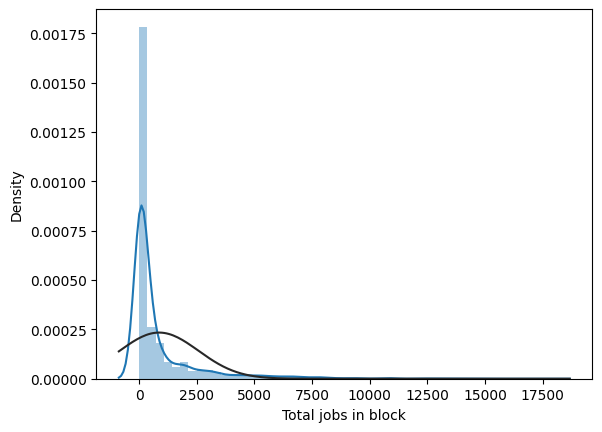

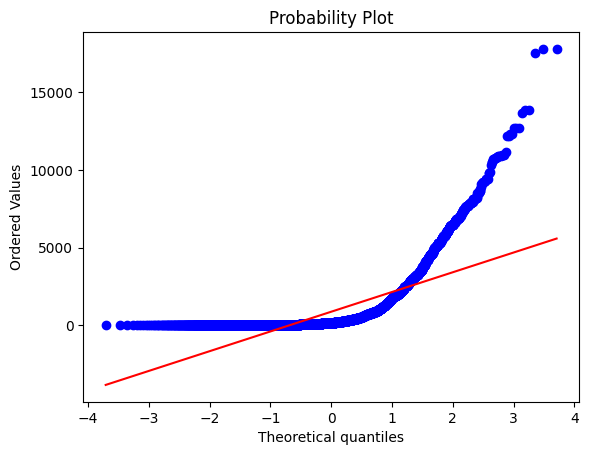

In [29]:
#Add headers before each part/chart so that the user can follow easier
sns.distplot(melbourne_job["Total jobs in block"], fit=norm)
fig = plt.figure()
prob = stats.probplot(melbourne_job["Total jobs in block"], plot=plt)

For the analysis performed the visualization of the distribution of a dataset called "Total jobs in block" along with a probability plot.

The distribution plot, created with the function sns.distplot, shows the probability density of the data. The x-axis represents the number of jobs in a block, while the y-axis represents the density. The curve depicts a bell-shaped distribution, which suggests that the data is normally distributed. The line superimposed on the curve is the probability density function (PDF) of a normal distribution that has been fitted to the data. This line helps to assess how well the normal distribution fits the data.
The probability plot, created with the function stats.probplot, shows how well the data follows a normal distribution. The x-axis represents the ordered values from the data set, while the y-axis represents the expected cumulative probability values for a normal distribution and in the distribution the points deviate slightly from a straight line, which shows that the data may not be perfectly normal.